# Premier League Teams Performance Analysis ⚽📊

## Project Overview  
In this project, we will analyze the performance of Premier League teams using official season statistics.  
Our goal is to extract **actionable football insights** to support sports decision-making.

## Business Questions we aim to answer:
- Which teams have the **strongest attacking performance**?
- How does **actual goals compare to Expected Goals (xG)**? (Finishing quality)
- Is **age a risk factor** affecting future squad performance?
- What are the **key features** that drive goals and success in the league?

## Tools & Skills Used:
- **Python**: Pandas, Numpy, Seaborn, Matplotlib  
- **Data Cleaning & Feature Engineering**  
- **Exploratory Data Analysis (EDA)**  
- **Football Performance Metrics** (xG, per90 statistics)  
- **Correlation & Squad Efficiency Evaluation**

---

> Outcome: Insights that help identify strengths, weaknesses, and opportunities to optimize team performance in the Premier League.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=sns.color_palette("Purples", 10))


In [2]:
file_path = r"C:\Users\DELL\Downloads\TEAMS_CLEANED اخر نسخه.csv"
df = pd.read_csv(file_path, encoding="utf-8")

df.head()

,Squad,# Pl,Age,MP,Min,Gls,Assists,G+A,Non_Penalty_Goals,Penalty_Goals,Penalty_Attempts,Expected_Goals,Non_Penalty_xG,Expected_Assists,npxG+xAG,YEAR
0,Arsenal,28,26.7,38,3420,69,52,121,65,4,5,60.1,56.0,46.7,102.7,2018
1,Bournemouth,28,26.6,38,3420,55,43,98,48,7,9,53.3,46.2,38.8,85.0,2018
2,Brighton,21,27.4,38,3420,35,24,59,30,5,6,35.3,30.7,24.5,55.2,2018
3,Burnley,23,28.0,38,3420,43,32,75,41,2,2,44.4,42.8,31.2,74.0,2018
4,Cardiff City,25,27.7,38,3420,33,20,53,30,3,4,42.4,39.2,27.6,66.8,2018


In [3]:
print("Shape:", df.shape)
df.info()
df.describe()
df.columns

Shape: (120, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Squad              120 non-null    object 
 1   # Pl               120 non-null    int64  
 2   Age                120 non-null    float64
 3   MP                 120 non-null    int64  
 4   Min                120 non-null    int64  
 5   Gls                120 non-null    int64  
 6   Assists            120 non-null    int64  
 7   G+A                120 non-null    int64  
 8   Non_Penalty_Goals  120 non-null    int64  
 9   Penalty_Goals      120 non-null    int64  
 10  Penalty_Attempts   120 non-null    int64  
 11  Expected_Goals     120 non-null    float64
 12  Non_Penalty_xG     120 non-null    float64
 13  Expected_Assists   120 non-null    float64
 14  npxG+xAG           120 non-null    float64
 15  YEAR               120 non-null    int64  
dtypes: float6

Index(['Squad', '# Pl', 'Age', 'MP', 'Min', 'Gls', 'Assists', 'G+A',
       'Non_Penalty_Goals', 'Penalty_Goals', 'Penalty_Attempts',
       'Expected_Goals', 'Non_Penalty_xG', 'Expected_Assists', 'npxG+xAG',
       'YEAR'],
      dtype='object')

In [6]:
#Convert Numeric Columns
num_cols = ['Age', 'MP', 'Min', 'Gls', 'Assists', 'G+A', 'Non_Penalty_Goals',
            'Penalty_Goals', 'Penalty_Attempts', 'Expected_Goals',
            'Non_Penalty_xG', 'Expected_Assists', 'npxG+xAG', 'YEAR']

for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['Min'])  # remove zero minutes cases
df.reset_index(drop=True, inplace=True)

In [23]:
#Top Scorers Analysis
top_scorers = df[['Squad', 'Gls', 'Expected_Goals', 'G_over_xG']] \
                .sort_values('Gls', ascending=False).head(10)

top_scorers

,Squad,Gls,Expected_Goals,G_over_xG
30,Manchester City,100,92.0,8.0
71,Manchester City,96,88.7,7.3
70,Liverpool,94,88.7,5.3
112,Manchester City,94,80.5,13.5
92,Manchester City,92,78.6,13.4
12,Manchester City,91,84.3,6.7
11,Liverpool,86,73.7,12.3
100,Arsenal,86,76.1,9.9
80,Arsenal,84,71.6,12.4
114,Newcastle Utd,83,76.0,7.0


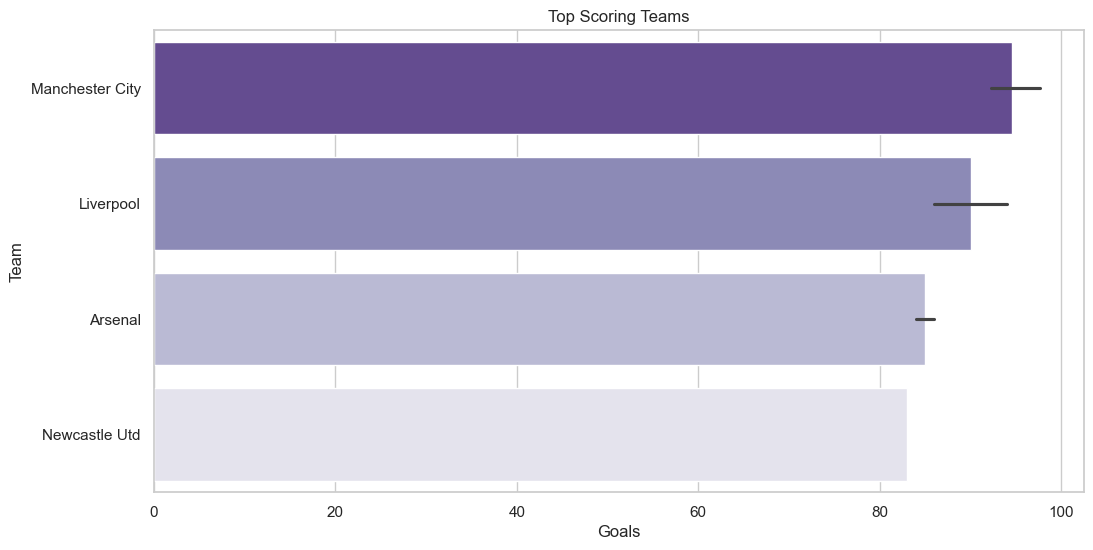

In [24]:
#ترتيب الفرق حسب الأهداف + المقارنة بـ Expected Goals
#مين أقوى هجوم في الدوري بالفعل؟
plt.figure()
sns.barplot(
    data=top_scorers,
    x='Gls',
    y='Squad',
    hue='Squad',  # added hue to avoid future warning
    dodge=False,  # keep bars solid without grouping
    legend=False, # disable legend because it's redundant
    palette="Purples_r"
)
plt.title("Top Scoring Teams")
plt.xlabel("Goals")
plt.ylabel("Team")
plt.show()

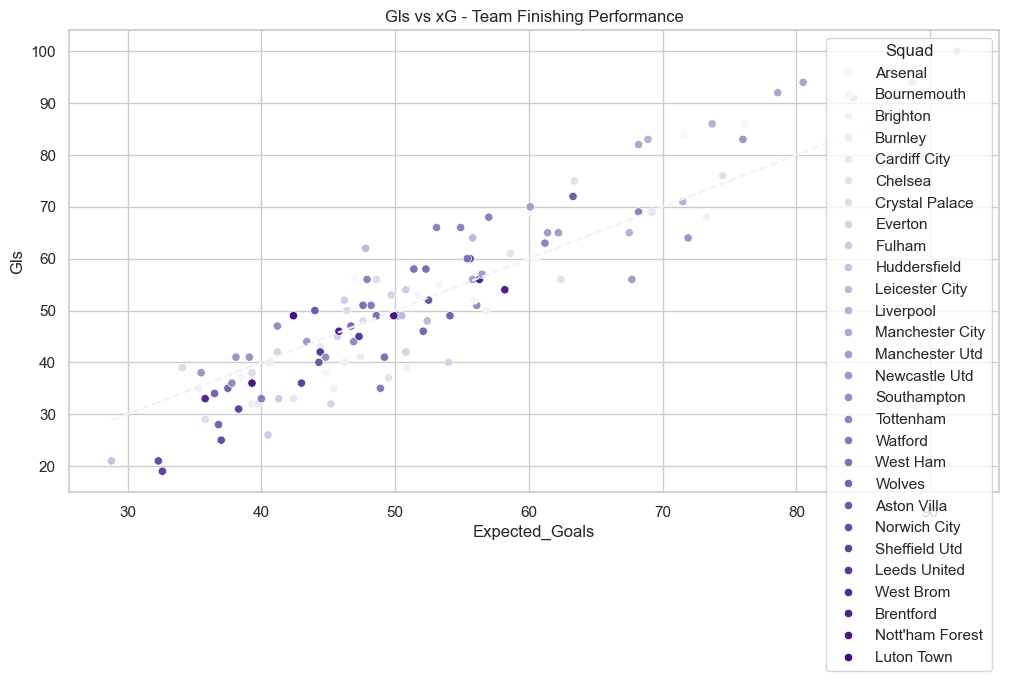

In [29]:
#Expected Goals vs Goals (Over/Under Perf.)
#فوق الخط → أداء تهديفي ممتاز
#تحت الخط → عقم هجومي
plt.figure()
sns.scatterplot(data=df, x='Expected_Goals', y='Gls', hue='Squad', palette="Purples")
plt.plot([df['Expected_Goals'].min(), df['Expected_Goals'].max()],
         [df['Expected_Goals'].min(), df['Expected_Goals'].max()],
         linestyle='--')
plt.title("Gls vs xG - Team Finishing Performance")
plt.show()

In [30]:
#op 10 Overperforming Teams
# Create column if not exists
df['G_over_xG'] = df['Gls'] - df['Expected_Goals']

# Sort and take top 10
top10_over = df[['Squad', 'Gls', 'Expected_Goals', 'G_over_xG']] \
               .sort_values('G_over_xG', ascending=False) \
               .head(10)

top10_over

,Squad,Gls,Expected_Goals,G_over_xG
69,Leicester City,62,47.8,14.2
29,Liverpool,83,68.9,14.1
51,Manchester City,82,68.2,13.8
112,Manchester City,94,80.5,13.5
92,Manchester City,92,78.6,13.4
56,Tottenham,66,53.1,12.9
80,Arsenal,84,71.6,12.4
11,Liverpool,86,73.7,12.3
65,Chelsea,75,63.4,11.6
16,Tottenham,66,54.9,11.1


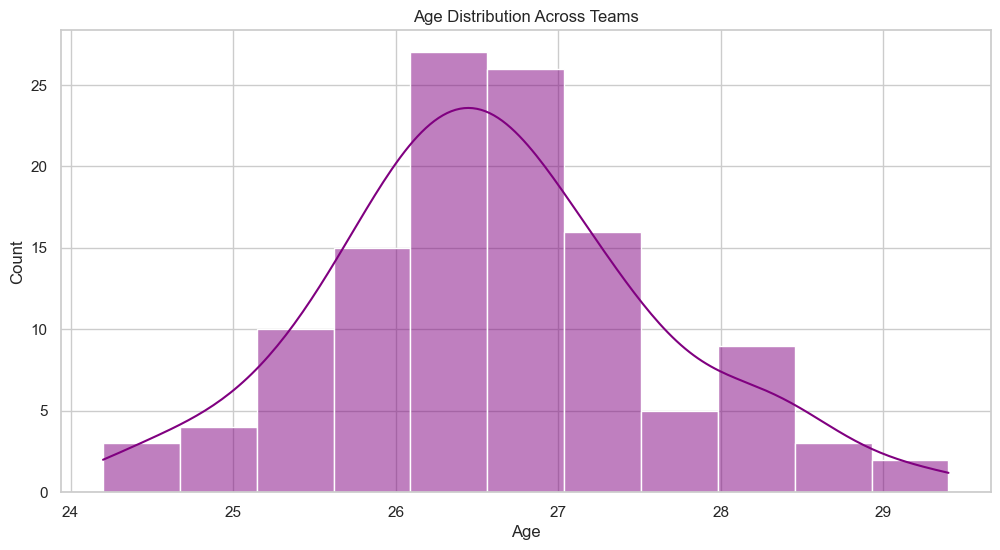

In [14]:
#Age Distribution
plt.figure()
sns.histplot(df['Age'], kde=True, color="purple")
plt.title("Age Distribution Across Teams")
plt.show()

In [32]:
# ترتيب الفرق حسب عدد الأهداف من الأعلى للأقل
top10_goals = df.sort_values(by='Gls', ascending=False).drop_duplicates(subset='Squad').head(10)

# عرض النتائج
print("Top 10 Teams Based on Highest Goals:")
display(top10_goals[['Squad', 'Gls', 'Expected_Goals']])

Top 10 Teams Based on Highest Goals:


,Squad,Gls,Expected_Goals
30,Manchester City,100,92.0
70,Liverpool,94,88.7
100,Arsenal,86,76.1
114,Newcastle Utd,83,76.0
106,Chelsea,76,74.5
101,Aston Villa,72,63.3
52,Manchester Utd,70,60.1
117,Tottenham,69,68.2
84,Brighton,68,73.3
28,Leicester City,65,62.2


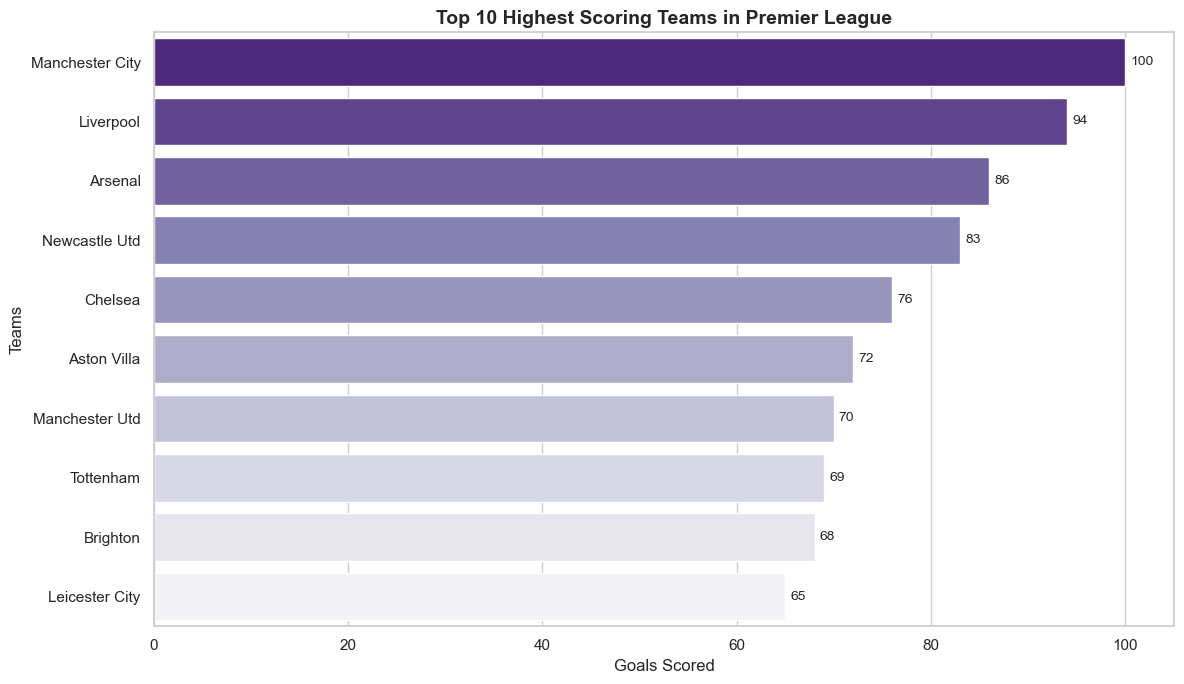

In [35]:
plt.figure(figsize=(12,7))

ax = sns.barplot(
    data=top10_goals,
    x='Gls',
    y='Squad',
    hue='Squad',
    palette='Purples_r',
    dodge=False,
    legend=False
)

# إضافة قيم الأهداف على الأشرطة
for i, v in enumerate(top10_goals['Gls']):
    ax.text(v + 0.5, i, str(v), va='center', fontsize=10)

plt.title("Top 10 Highest Scoring Teams in Premier League", fontsize=14, fontweight='bold')
plt.xlabel("Goals Scored", fontsize=12)
plt.ylabel("Teams", fontsize=12)
plt.tight_layout()
plt.show()

# Business Recommendations – Premier League Team Performance
Based on the analysis of Goals, Expected Goals (xG), and additional performance metrics, the following recommendations are proposed:

---

## 1. Finishing Efficiency (Goals vs xG)
- Teams overperforming xG show strong finishing.
  *Recommendation:* Maintain the current attacking structure and player stability.
- Teams underperforming xG struggle to convert chances.
  *Recommendation:* Improve finishing training, strengthen the attacking line, and enhance decision-making inside the box.

---

## 2. High-Scoring Teams
- Teams with higher goal numbers tend to secure stronger league positions.
  *Recommendation:* Leverage offensive strength in marketing and fan engagement strategies.

---

## 3. Defensive Organization
- Teams presenting low xGA demonstrate effective defensive systems.
  *Recommendation:* Retain key defensive players and continue tactical stability.

---

## 4. Chance Creation vs Conversion
- Teams generating high npxG+xAG but low goals are not converting chances effectively.
  *Recommendation:* Focus on improving final passes and transitions in the attacking third.

---

## 5. Seasonal Consistency
- Teams consistently appearing among top performers indicate sustainable squad quality.
  *Recommendation:* Maintain long-term squad planning and youth development aligned with the team’s playing style.

---

## Key Takeaway
Improving conversion rates and maximizing expected goal potential can yield better results, competitiveness, and overall club performance in future seasons.